In [35]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [36]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## Create iPhone13 Pool Model

## iPhone13_Pool

In [5]:
class_label = 10
for i in range(class_label):

    path1 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/"
    path2 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/"
    path3 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone13_Beer Sheve,Israel/"

    if(i==0):
        data = getData(path1 + "iPhone13_I/calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

        data = getData(path1 + "iPhone13_II/calender-app.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)
        
        X_dataset = np.concatenate((X, dataset), axis=0) 
        Y_label = np.concatenate((Y, label), axis=0)

        data = getData(path1 + "iPhone13_III/calendar-app.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)
        
        X_dataset = np.concatenate((X, dataset), axis=0) 
        Y_label = np.concatenate((Y, label), axis=0)

        data = getData(path2 + "iPhone13_I_data1/calendar_app.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)
        
        X_dataset = np.concatenate((X, dataset), axis=0) 
        Y_label = np.concatenate((Y, label), axis=0)

        data = getData(path2 + "iPhone13_I_data2/calendar_app.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)
        
        X_dataset = np.concatenate((X, dataset), axis=0) 
        Y_label = np.concatenate((Y, label), axis=0)

        data = getData(path3 + "calendar_app.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)
        
        X_dataset = np.concatenate((X, dataset), axis=0) 
        Y_label = np.concatenate((Y, label), axis=0)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, X_dataset), axis=0) 
        Y = np.concatenate((Y, Y_label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/EM_signals_iPhone13_I_Validate/i13_I_data1.csv', header=False)

[0.0078125+0.0234375j 0.       +0.j        0.0234375+0.j        ...
 0.       +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
82435
(2048, 82435)
[0.01839778 0.00970962 0.00328338 ... 0.00214767 0.00365468 0.0095812 ]
(10000, 2048)
(10000,)
[0.0078125+0.j        0.       +0.015625j  0.0234375+0.0078125j ...
 0.015625 +0.j        0.0234375+0.0078125j 0.0234375+0.0078125j]
2048
86095
(2048, 86095)
[0.01843173 0.00946957 0.00374642 ... 0.00186381 0.00396029 0.00955348]
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.015625 +0.j        0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.0078125j 0.0234375+0.015625j ]
2048
73940
(2048, 73940)
[0.01829132 0.00990963 0.00342399 ... 0.00169991 0.00337759 0.00956888]
(30000, 2048)
(30000,)
[0.015625 +0.015625j  0.015625 +0.j        0.0078125-0.0078125j ...
 0.0234375+0.0078125j 0.0078125+0.015625j  0.015625 -0.0078125j]
2048
86822
(2048, 86822)
[0.01869311 0.00973575 0.00366161 ... 0.001999   0.00377608 0.00975098]
(40000, 204

In [4]:
path1 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/"
path2 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/"
path3 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Location_oriented/iPhone13_Beer Sheve,Israel/"

In [5]:
class_label = i = 0

data = getData(path1 + "iPhone13_I/calender-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, i)

data = getData(path1 + "iPhone13_II/calender-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/calendar-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/calendar_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/calendar_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "calendar_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0234375+0.j        ...
 0.0234375+0.015625j  0.015625 +0.j        0.0078125+0.j       ]
2048
83750
(2048, 83750)
[0.01833543 0.00961571 0.00367982 ... 0.00215231 0.00389023 0.00958879]
[0.0078125+0.0234375j 0.       +0.j        0.0234375+0.j        ...
 0.   

In [6]:
class_label = i = 1

data = getData(path1 + "iPhone13_I/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/camera_photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/camera_photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "camera_photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
[0.03125 +0.0078125j 0.03125 +0.015625j  0.015625+0.015625j  ...
 0.015625+0.015625j  0.015625+0.j        0.015625+0.j       ]
2048
84262
(2048, 84262)
[0.01871342 0.00962076 0.00392026 ... 0.00172973 0.00385315 0.00959814]
[0.0078125+0.j        0.       +0.015625j  0.0234375+0.0078125j ...
 0.015625 +0.j    

In [7]:
class_label = i = 2

data = getData(path1 + "iPhone13_I/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/camera_video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/camera_video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "camera_video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
[0.0234375+0.j        0.0234375+0.0234375j 0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
79732
(2048, 79732)
[0.01835802 0.00962685 0.00344502 ... 0.00159603 0.00344605 0.00971396]
[0.015625 +0.0078125j 0.       +0.0078125j 0.0234375+0.015625j  ...
 0.015625 +0.0078125j 0.       -0.0078125j 0.015625 +0.0078125j]
2048
83224
(2048, 83224)
[0.01831909 0.00954875 0.00370389 ... 0.0018516  0.0036198  0.00960332]
[0.03125  +0.015625j  0.015625 +0.j        0.015625 +0.015625j  ...
 0.015625 +0

In [8]:
class_label = i = 3

data = getData(path1 + "iPhone13_I/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/email_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/email_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "email_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.00951074]
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.015625j  ...
 0.       -0.0078125j 0.015625 -0.0078125j 0.03125  +0.0078125j]
2048
72926
(2048, 72926)
[0.01814387 0.00948817 0.00355478 ... 0.00184933 0.0035476  0.0094812 ]
[0.0078125+0.0078125j 0.03125  +0.j        0.0078125+0.0078125j ...
 0.015625 +0.j        0.0234375+0.0078125j 0.015625 +0.015625j ]
2048
80898
(2048, 80898)
[0.01839363 0.00966465 0.00364197 ... 0.00196357 0.00373289 0.00969818]
[0.015625 +0.015625j  0.015625 +0.j        0.0078125-0.0078125j ...
 0.0234375+0

In [9]:
class_label = i = 4

data = getData(path1 + "iPhone13_I/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/gallary_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/gallery_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "gallery_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.0078125+0.j         0.015625 +0.0078125j  0.015625 +0.015625j  ...
 -0.0078125-0.0078125j  0.015625 -0.0078125j  0.015625 +0.j       ]
2048
81924
(2048, 81924)
[0.018229   0.00966399 0.00349916 ... 0.0020021  0.00391866 0.00949263]
[0.0390625+0.j        0.015625 +0.0234375j 0.015625 +0.j        ...
 0.0078125+0.0078125j 0.015625 +0.015625j  0.015625 +0.0078125j]
2048
71462
(2048, 71462)
[0.01826507 0.00975554 0.00367946 ... 0.00179136 0.0036102  0.00943712]
[0.0234375+0.0078125j 0.0234375+0.0078125j 0.0234375+0.j        ...
 0.0078125+0.015625j  0.0234375-0.015625j  0.015625 +0.015625j ]
2048
70219
(2048, 70219)
[0.01831812 0.00958718 0.00350358 ... 0.00182362 0.00372122 0.00951167]
[0.015625 +0.0078125j 0.015625 +0.03125j   0.0234375+0.0078125j ...
 0.0078125+0.015625j  0.015625 +0.015625j  0.0078125+0.j       ]
2048
80633
(2048, 80633)
[0.0191914  0.00963902 0.0042004  ... 0.00229618 0.00411808 0.00966532]
[ 0.0078125+0.j         0.0078125+0.0078125j  0.0078125+0.j        ...
  0

In [10]:
class_label = i = 5

data = getData(path1 + "iPhone13_I/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/home_screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/home_screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "home_screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.0078125j 0.0078125+0.j        0.0078125+0.0078125j ...
 0.015625 +0.0078125j 0.       -0.0078125j 0.015625 -0.0078125j]
2048
87043
(2048, 87043)
[0.01827244 0.0094937  0.00347372 ... 0.00184199 0.00369919 0.00941139]
[ 0.015625 +0.j         0.015625 +0.0078125j  0.0234375-0.0078125j ...
 -0.0078125-0.0078125j  0.015625 +0.0078125j  0.0234375-0.0078125j]
2048
77534
(2048, 77534)
[0.01885366 0.00955299 0.00381812 ... 0.00175554 0.00354502 0.00999323]
[0.03125  +0.j        0.015625 +0.0078125j 0.       +0.0078125j ...
 0.0078125+0.j        0.0078125+0.0078125j 0.0234375-0.0078125j]
2048
73439
(2048, 73439)
[0.01814429 0.00948737 0.00341386 ... 0.00191901 0.00374672 0.00948966]
[0.015625 +0.0078125j 0.015625 +0.j        0.03125  +0.015625j  ...
 0.015625 +0.0234375j 0.015625 +0.j        0.0234375+0.0078125j]
2048
82800
(2048, 82800)
[0.01855639 0.00971475 0.00363123 ... 0.00197672 0.00371212 0.00965389]
[0.       +0.j        0.015625 +0.0078125j 0.015625 +0.015625j  ...
 0.   

In [11]:
class_label = i = 6

data = getData(path1 + "iPhone13_I/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.       -0.0078125j ...
 0.015625 +0.j        0.015625 +0.0078125j 0.       +0.0078125j]
2048
80022
(2048, 80022)
[0.01823433 0.00957463 0.0036588  ... 0.00179094 0.00355725 0.00951913]
[0.0078125+0.0078125j 0.       +0.0078125j 0.015625 +0.0078125j ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.j       ]
2048
71756
(2048, 71756)
[0.01843879 0.00944655 0.00375897 ... 0.00207559 0.00387582 0.00955302]
[0.015625 +0.015625j  0.0078125+0.0078125j 0.0234375+0.0078125j ...
 0.015625 +0.015625j  0.015625 +0.0078125j 0.0078125+0.0078125j]
2048
69895
(2048, 69895)
[0.01831148 0.00957138 0.00356465 ... 0.00186656 0.00368411 0.00954022]
[0.0078125+0.j        0.015625 +0.0078125j 0.0234375+0.j        ...
 0.0078125+0.015625j  0.015625 +0.j        0.015625 +0.0234375j]
2048
83605
(2048, 83605)
[0.01846733 0.00968849 0.00352544 ... 0.00183377 0.00357467 0.00977176]
[0.015625 +0.015625j  0.015625 -0.0078125j 0.015625 +0.0078125j ...
 0.0078125+0

In [12]:
class_label = i = 7

data = getData(path1 + "iPhone13_I/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/phone_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/phone_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "phone_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0078125+0.0078125j 0.015625 +0.j        ...
 0.015625 +0.015625j  0.03125  +0.015625j  0.015625 +0.0078125j]
2048
91505
(2048, 91505)
[0.01846059 0.01017757 0.00355808 ... 0.00216458 0.00378412 0.01003891]
[0.0078125+0.0078125j 0.015625 +0.015625j  0.015625 +0.j        ...
 0.015625 +0.0078125j 0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
73292
(2048, 73292)
[0.01814853 0.00943132 0.00351341 ... 0.00200969 0.00380519 0.00951231]
[0.0078125+0.015625j  0.015625 -0.0078125j 0.03125  -0.0078125j ...
 0.0234375+0.j        0.0078125+0.015625j  0.0078125+0.015625j ]
2048
105986
(2048, 105986)
[0.01823477 0.00951891 0.00358417 ... 0.00211496 0.00367384 0.00949519]
[0.0078125+0.015625j  0.0078125+0.0078125j 0.0078125+0.j        ...
 0.0078125+0.0078125j 0.0078125+0.015625j  0.015625 +0.j       ]
2048
80971
(2048, 80971)
[0.01825156 0.00971597 0.0036275  ... 0.00200302 0.00343845 0.00961279]
[0.0234375+0.015625j  0.015625 +0.015625j  0.       -0.0078125j ...
 0.015625 

In [13]:
class_label = i = 8

data = getData(path1 + "iPhone13_I/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/sms_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/sms_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "sms_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.015625j  0.0078125+0.j        0.0234375+0.j        ...
 0.015625 +0.0234375j 0.015625 -0.015625j  0.015625 +0.0234375j]
2048
90846
(2048, 90846)
[0.01815063 0.00949299 0.00352803 ... 0.00193189 0.00359627 0.00958246]
[0.015625 +0.0078125j 0.015625 +0.0078125j 0.015625 +0.j        ...
 0.0234375+0.0078125j 0.0078125+0.015625j  0.0234375+0.0078125j]
2048
71611
(2048, 71611)
[0.01817658 0.00939571 0.00359913 ... 0.00174631 0.00362656 0.00942984]
[0.0234375+0.j        0.015625 +0.0078125j 0.0078125+0.0078125j ...
 0.0234375+0.0078125j 0.03125  +0.015625j  0.015625 +0.0078125j]
2048
73073
(2048, 73073)
[0.01833369 0.00956394 0.00357049 ... 0.00202475 0.0036879  0.0095438 ]
[0.0078125+0.j        0.0234375-0.0078125j 0.0234375+0.j        ...
 0.0234375+0.j        0.0234375-0.0078125j 0.0078125+0.j       ]
2048
83750
(2048, 83750)
[0.01820678 0.00957276 0.00346206 ... 0.00164647 0.00344448 0.00957328]
[0.0234375+0.015625j  0.0078125+0.0078125j 0.0078125+0.0078125j ...
 0.0234375+0

In [14]:
class_label = i = 9

data = getData(path1 + "iPhone13_I/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_II/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path1 + "iPhone13_III/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data1/web_browser_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path2 + "iPhone13_I_data2/web_browser_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

data = getData(path3 + "web_browser_app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, i)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 3.1250000e-02+7.8125000e-03j  1.5625000e-02+1.5625000e-02j
  1.5625000e-02+0.0000000e+00j ... -1.3769394e-33-7.7207416e-35j
 -6.0356438e-12-3.6518317e+31j  2.0628625e-32-6.2134089e-35j]
2048
81414
(2048, 81414)
[2.0676641e+35 5.4073593e+35 2.4178817e+35 ... 8.1073708e+34 2.0754027e+35
 2.6083747e+35]
[0.0234375+0.j        0.03125  +0.0078125j 0.03125  +0.015625j  ...
 0.0390625+0.0078125j 0.0234375+0.j        0.       +0.0078125j]
2048
84116
(2048, 84116)
[0.01812239 0.00943426 0.00367463 ... 0.00178114 0.00367117 0.00942098]
[0.0234375+0.0078125j 0.03125  +0.0078125j 0.015625 +0.j        ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375-0.015625j ]
2048
81190
(2048, 81190)
[0.01873207 0.00957678 0.00342764 ... 0.002072   0.00412383 0.00962331]
[0.015625 +0.j        0.03125  +0.j        0.0234375+0.015625j  ...
 0.0234375-0.0078125j 0.03125  +0.015625j  0.015625 +0.0078125j]
2048
84423
(2048, 84423)
[0.01841502 0.0096185  0.00364683 ... 0.00180454 0.00367076 0.00967107]
[0.015

In [47]:
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

In [16]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2023-03-01 14:30:01.409924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [18]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[checkpoint_cb])

Epoch 1/30
12000/12000 [==============================] - 179s 15ms/step - loss: 1.8732 - accuracy: 0.3878 - val_loss: 1.1186 - val_accuracy: 0.6856
Epoch 2/30
12000/12000 [==============================] - 117s 10ms/step - loss: 0.4790 - accuracy: 0.8707 - val_loss: 0.1880 - val_accuracy: 0.9566
Epoch 3/30
12000/12000 [==============================] - 114s 10ms/step - loss: 0.1129 - accuracy: 0.9744 - val_loss: 0.0884 - val_accuracy: 0.9790
Epoch 4/30
12000/12000 [==============================] - 107s 9ms/step - loss: 0.0590 - accuracy: 0.9870 - val_loss: 0.0558 - val_accuracy: 0.9879
Epoch 5/30
12000/12000 [==============================] - 111s 9ms/step - loss: 0.0394 - accuracy: 0.9916 - val_loss: 0.0394 - val_accuracy: 0.9917
Epoch 6/30
12000/12000 [==============================] - 108s 9ms/step - loss: 0.0293 - accuracy: 0.9940 - val_loss: 0.0335 - val_accuracy: 0.9927
Epoch 7/30
12000/12000 [==============================] - 114s 9ms/step - loss: 0.0229 - accuracy: 0.9956 - v

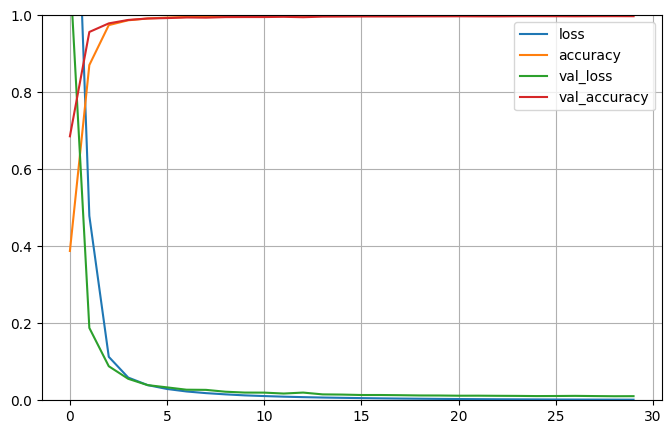

In [19]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [39]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5")

In [20]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

3750/3750 [==============================] - 20s 5ms/step - loss: 0.0107 - accuracy: 0.9975
test loss, test acc: [0.01070309430360794, 0.9974666833877563]


In [21]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

3750/3750 [==============================] - 21s 5ms/step
[4 3 1 ... 1 0 6]
4
[[11925     3     1     0     3     3     2     0     0     5]
 [    3 11922     6     4     5     2     9     6     6     3]
 [    0     4 12043     3     1     1     5     1     2     2]
 [    1     1     3 11818     7     2     6    10     4     3]
 [    2     8     8     4 11996     1     3     1     3     5]
 [    2     1     5     4     3 11975    16     3    10     5]
 [    2     3     3     2     1     6 12079     3     3     2]
 [    0     3     1     2     0     0     2 12013     2     6]
 [    2     9     0     3     1     7     4     5 12026     5]
 [    0     4     1     2     7     6     3     1     2 11899]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11942
           1       1.00      1.00      1.00     11966
           2       1.00      1.00      1.00     12062
           3       1.00      1.00      1.00     11855
           4       1

Test Accuracy:0.9974666666666666


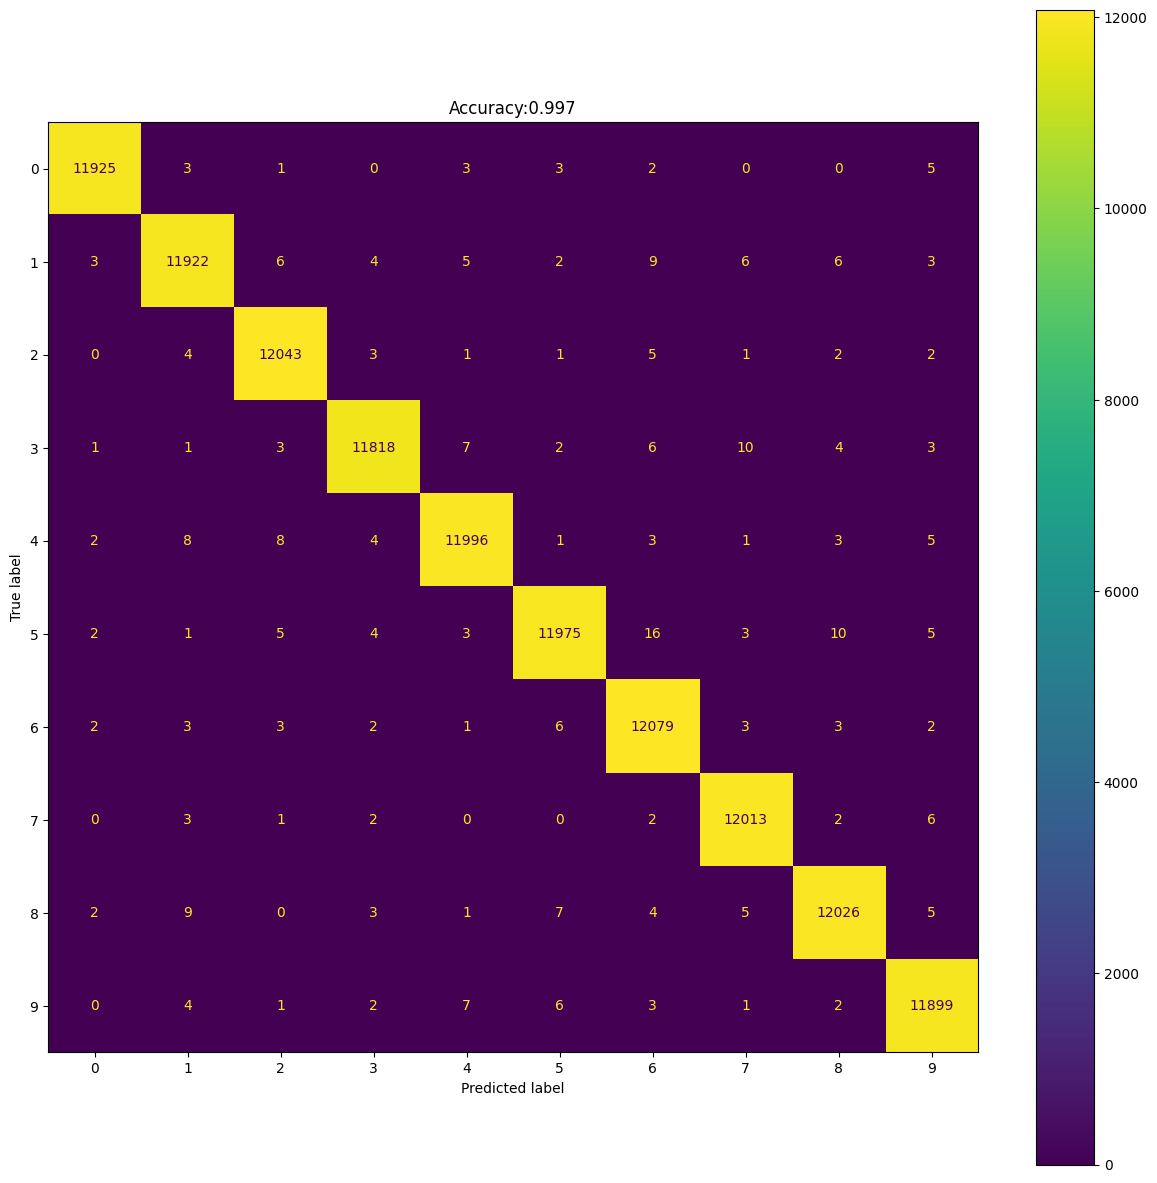

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_pool_confusion_matrix.pdf')

In [25]:
model.save("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5")

## Cross Model Checking with pool dataset

## iPhone13_I(ii) model

In [15]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

2023-03-02 11:10:36.032196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [16]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

18750/18750 [==============================] - 82s 4ms/step - loss: 11.4632 - accuracy: 0.1174
test loss, test acc: [11.463175773620605, 0.11743000149726868]


In [17]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

18750/18750 [==============================] - 74s 4ms/step
[[   21  6076     0  7191  4483    57    34  7468 19898 14772]
 [    4  5594   555  9738 21854  6659   420  9940     7  5229]
 [    5   514    90  9056  8144 25263  2947  6947  2829  4205]
 [  879  2580  8971  9533  7268 17654   485   702 10094  1834]
 [    1  6150    36 13290 24030  3064  4562  6349    38  2480]
 [    2  6262    62  2626 27835 10051  1338   915     0 10909]
 [    1  4909   346 10000  1111 10554  3905  4984  3544 20646]
 [12332  2875  7728  9620   972  8559    12  6461 11394    47]
 [    1 13164  2614  6410 13686 11027  5886  1647    99  5466]
 [    1   162     1  5336  6397 18703   694  8032 10000 10674]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     60000
           1       0.12      0.09      0.10     60000
           2       0.00      0.00      0.00     60000
           3       0.12      0.16      0.13     60000
           4       0.21      0.40     

Test Accuracy:0.11743


Text(0.5, 1.0, 'Accuracy:0.117')

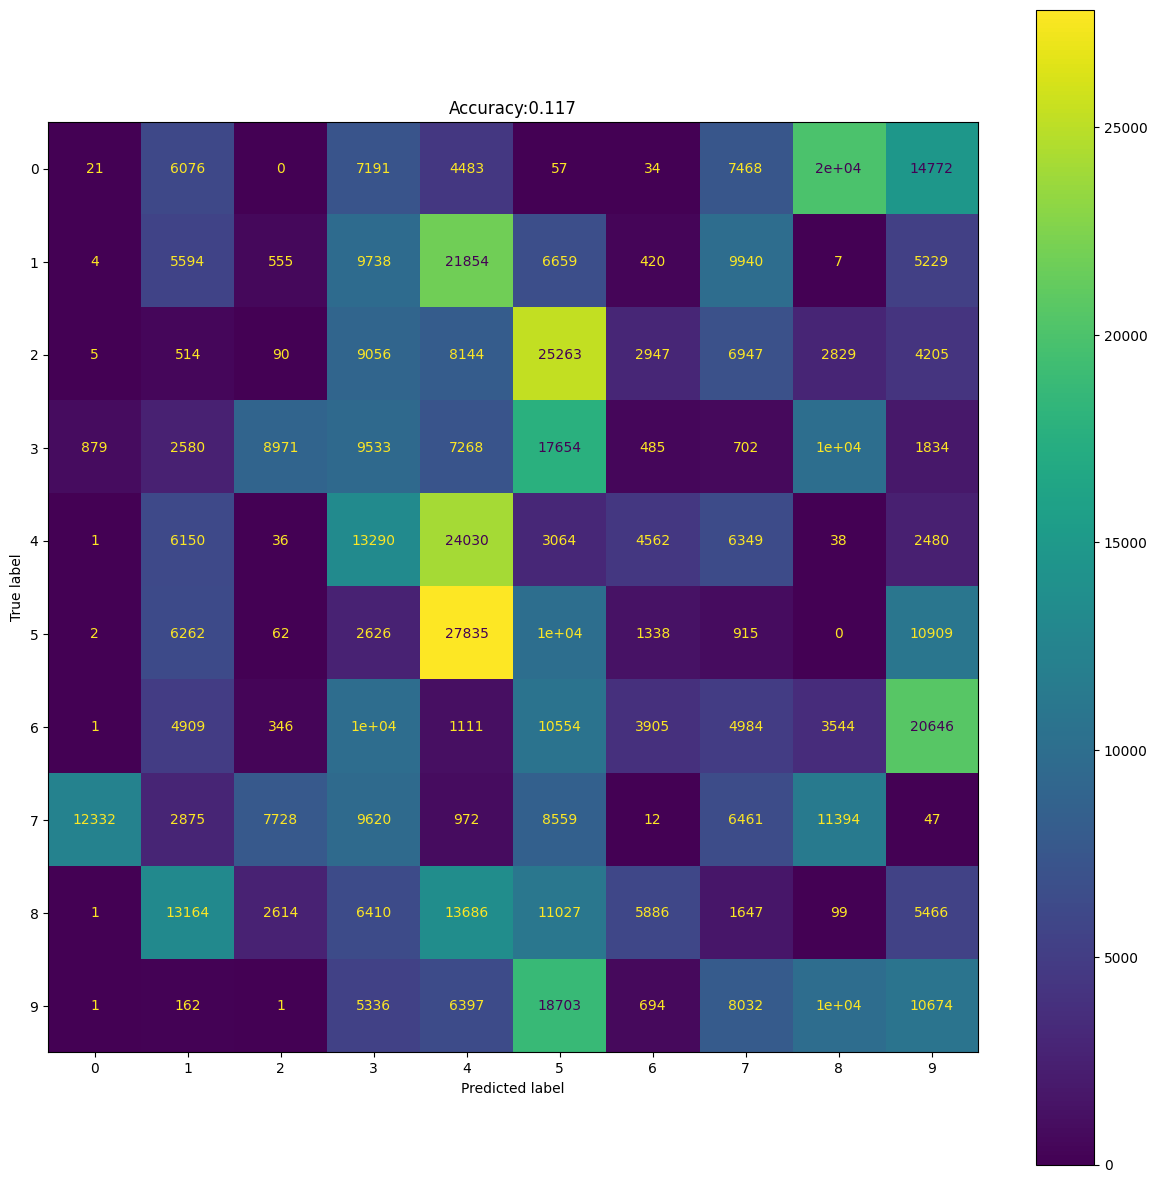

In [18]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [19]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [20]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
18750/18750 [==============================] - 89s 5ms/step - loss: 2.1213 - accuracy: 0.2614
Epoch 2/30
18750/18750 [==============================] - 83s 4ms/step - loss: 1.7257 - accuracy: 0.3634
Epoch 3/30
18750/18750 [==============================] - 81s 4ms/step - loss: 1.6376 - accuracy: 0.4048
Epoch 4/30
18750/18750 [==============================] - 74s 4ms/step - loss: 1.5783 - accuracy: 0.4283
Epoch 5/30
18750/18750 [==============================] - 74s 4ms/step - loss: 1.5340 - accuracy: 0.4458
Epoch 6/30
18750/18750 [==============================] - 62s 3ms/step - loss: 1.4993 - accuracy: 0.4590
Epoch 7/30
18750/18750 [==============================] - 62s 3ms/step - loss: 1.4709 - accuracy: 0.4698
Epoch 8/30
18750/18750 [==============================] - 61s 3ms/step - loss: 1.4467 - accuracy: 0.4792
Epoch 9/30
18750/18750 [==============================] - 61s 3ms/step - loss: 1.4264 - accuracy: 0.4861
Epoch 10/30
18750/18750 [==============================

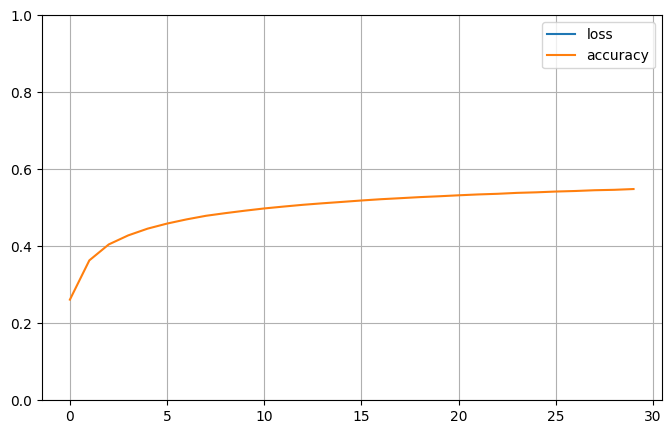

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

18750/18750 [==============================] - 83s 4ms/step - loss: 1.2410 - accuracy: 0.5515
test loss, test acc: [1.2409627437591553, 0.5514733195304871]


In [23]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

18750/18750 [==============================] - 78s 4ms/step
[[41104  2410    59   203  3426  2185  7076   106   846  2585]
 [ 2536 32824  3073  1073  7384  5535  1382  2173  1310  2710]
 [  698  2822 32414  4467  7671  4327  1585   972  1168  3876]
 [  188  2304  6611 27046  8682  3318  3100  2569  1577  4605]
 [  871  8603  3073   687 30022  3594  4885   513  3623  4129]
 [ 3365  6358  4922   806  9158 21905  6152   691  2472  4171]
 [ 2378  1541  2477  1162  1673  2276 38667  2718  3851  3257]
 [   39  1418  2481  2273   517   351   506 48615  2273  1527]
 [ 1550  2182  4087   793  3660  8364  3493  3305 29308  3258]
 [10905  2635  2720  3672  3712  1643  4482   417   835 28979]]
              precision    recall  f1-score   support

           0       0.65      0.69      0.66     60000
           1       0.52      0.55      0.53     60000
           2       0.52      0.54      0.53     60000
           3       0.64      0.45      0.53     60000
           4       0.40      0.50     

Test Accuracy:0.5514733333333334


Text(0.5, 1.0, 'Accuracy:0.551')

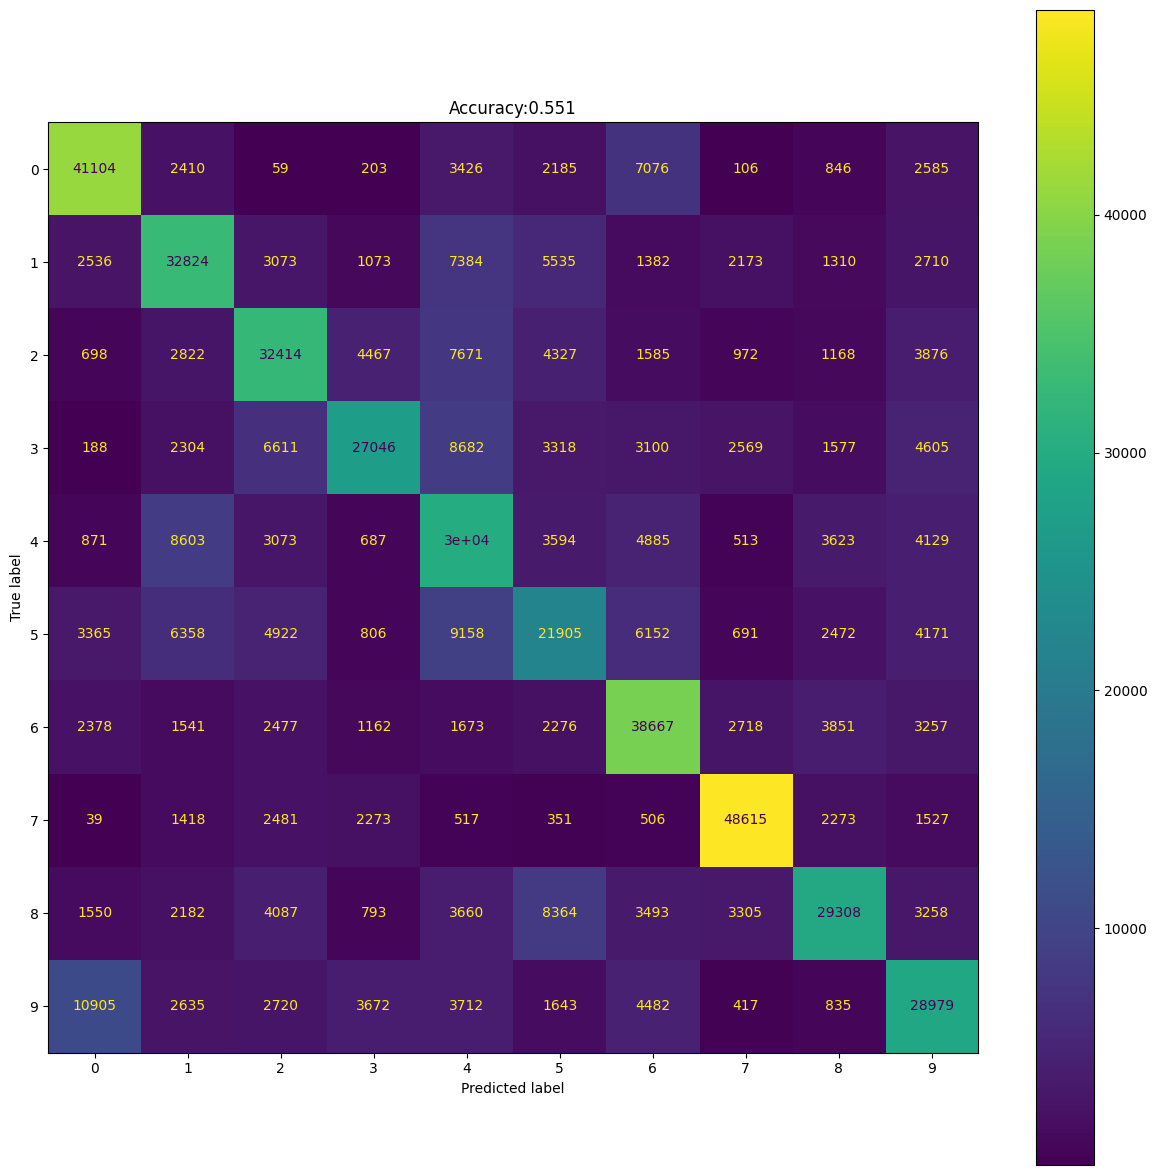

In [24]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

In [25]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

18750/18750 [==============================] - 92s 5ms/step - loss: 11.2334 - accuracy: 0.0540
test loss, test acc: [11.233375549316406, 0.054044999182224274]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

18750/18750 [==============================] - 74s 4ms/step
[[   62    32  4481 35115     0     0     3     0 19957   350]
 [ 1743  5149  8662 42023     0     3  2412     1     0     7]
 [ 9895  6213  3779 21768   185 13082  4430   648     0     0]
 [ 9294 15200  3353 19692    30  1666   453   307 10000     5]
 [  269  4240 14765 33901    10    90  6721     1     0     3]
 [ 4905  2269  6918 44314     0    33  1551    10     0     0]
 [ 7360  5969  4558 36217   245   469  3695  1484     0     3]
 [ 2033  4686  8096 18102 17928  1378  7770     5     0     2]
 [ 2230  1007  6873 39899     1  8493  1462    35     0     0]
 [15759    71  3607 29483     0   250   471   357 10000     2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     60000
           1       0.11      0.09      0.10     60000
           2       0.06      0.06      0.06     60000
           3       0.06      0.33      0.10     60000
           4       0.00      0.00     

Test Accuracy:0.054045


Text(0.5, 1.0, 'Accuracy:0.054')

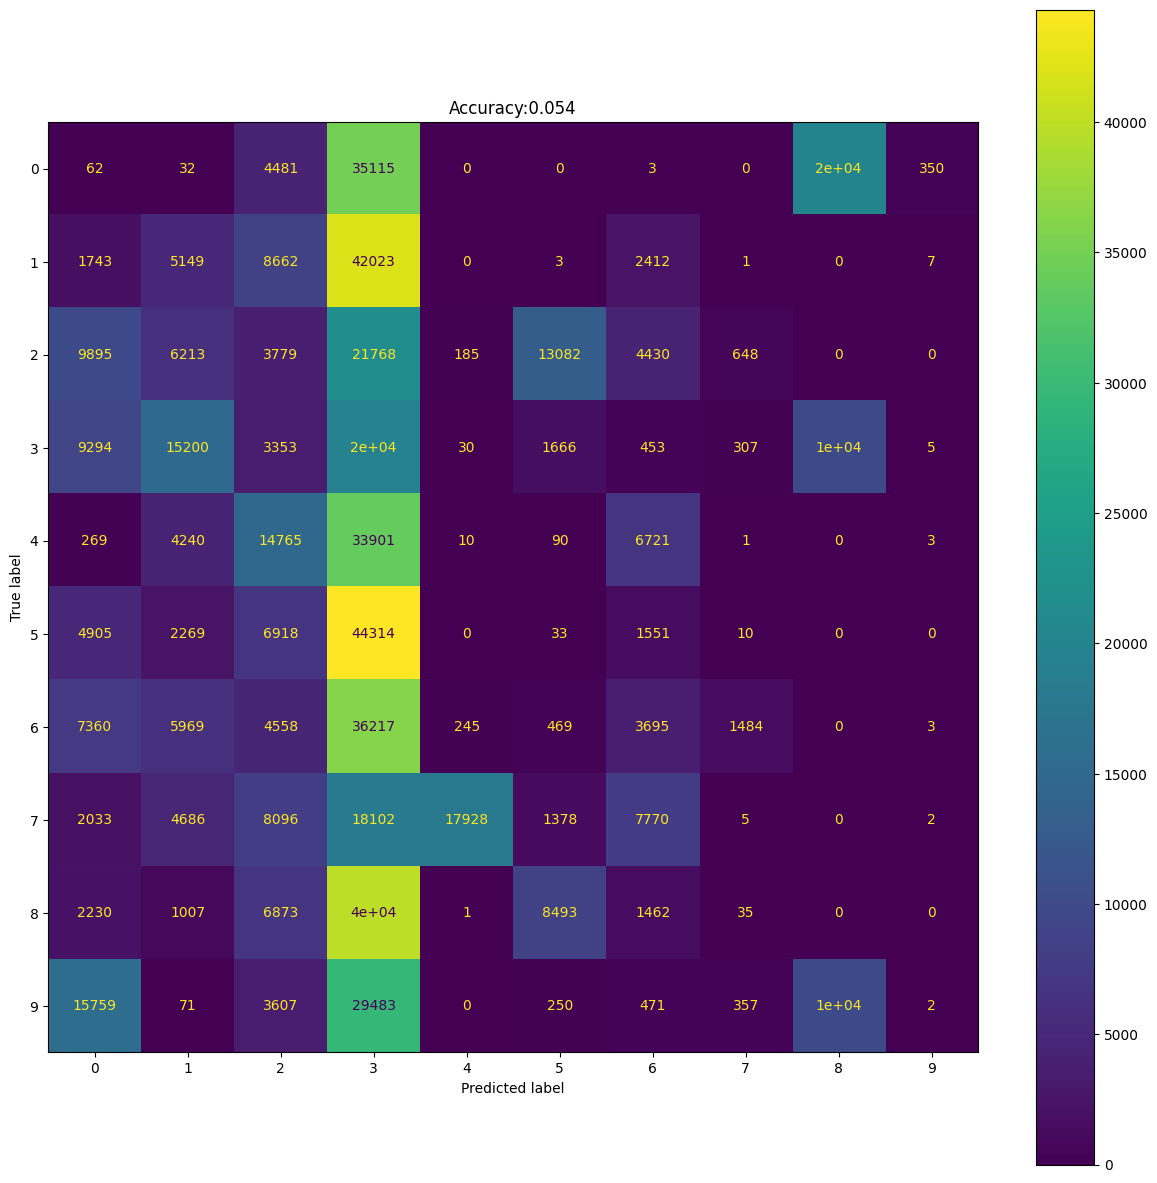

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [29]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [30]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
18750/18750 [==============================] - 75s 4ms/step - loss: 2.2536 - accuracy: 0.2229
Epoch 2/30
18750/18750 [==============================] - 73s 4ms/step - loss: 1.9229 - accuracy: 0.2938
Epoch 3/30
18750/18750 [==============================] - 72s 4ms/step - loss: 1.8646 - accuracy: 0.3114
Epoch 4/30
18750/18750 [==============================] - 74s 4ms/step - loss: 1.8283 - accuracy: 0.3237
Epoch 5/30
18750/18750 [==============================] - 79s 4ms/step - loss: 1.8010 - accuracy: 0.3343
Epoch 6/30
18750/18750 [==============================] - 100s 5ms/step - loss: 1.7794 - accuracy: 0.3427
Epoch 7/30
18750/18750 [==============================] - 81s 4ms/step - loss: 1.7609 - accuracy: 0.3503
Epoch 8/30
18750/18750 [==============================] - 81s 4ms/step - loss: 1.7450 - accuracy: 0.3574
Epoch 9/30
18750/18750 [==============================] - 81s 4ms/step - loss: 1.7310 - accuracy: 0.3626
Epoch 10/30
18750/18750 [=============================

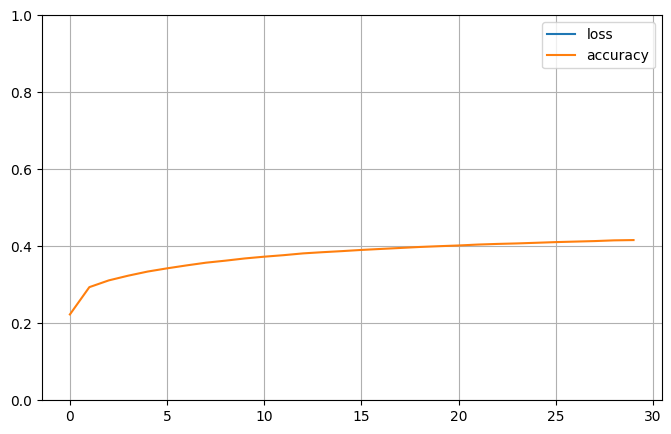

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

18750/18750 [==============================] - 85s 5ms/step - loss: 1.5874 - accuracy: 0.4182
test loss, test acc: [1.587354063987732, 0.4181566536426544]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

18750/18750 [==============================] - 82s 4ms/step
[[36305  2834   239   288  4674  4657  3871   247  5173  1712]
 [ 4431 26412  1873  1833  7739  3579  2407  3787  5055  2884]
 [ 3278  7090 25211  4799  6448  5020  2390  1103  1834  2827]
 [ 3299  2752  4868 27197  7484  2254  3434  2845  1441  4426]
 [ 2971  8925  2703  1060 29004  2574  4213  2279  3756  2515]
 [ 3766  9255  3683  1729 10380 13231  6154  1164  3694  6944]
 [ 1793  1717  3172  4851  3408  3991 22972  3674  6742  7680]
 [ 1702  4206  2449  1946  4112  2170  3560 31696  6305  1854]
 [ 2701  6108  8589  1876  4147  4373  7068  2615 19601  2922]
 [11466  3627  4014  2568  6253  2916  4694   958  4239 19265]]
              precision    recall  f1-score   support

           0       0.51      0.61      0.55     60000
           1       0.36      0.44      0.40     60000
           2       0.44      0.42      0.43     60000
           3       0.56      0.45      0.50     60000
           4       0.35      0.48     

Test Accuracy:0.4181566666666667


Text(0.5, 1.0, 'Accuracy:0.418')

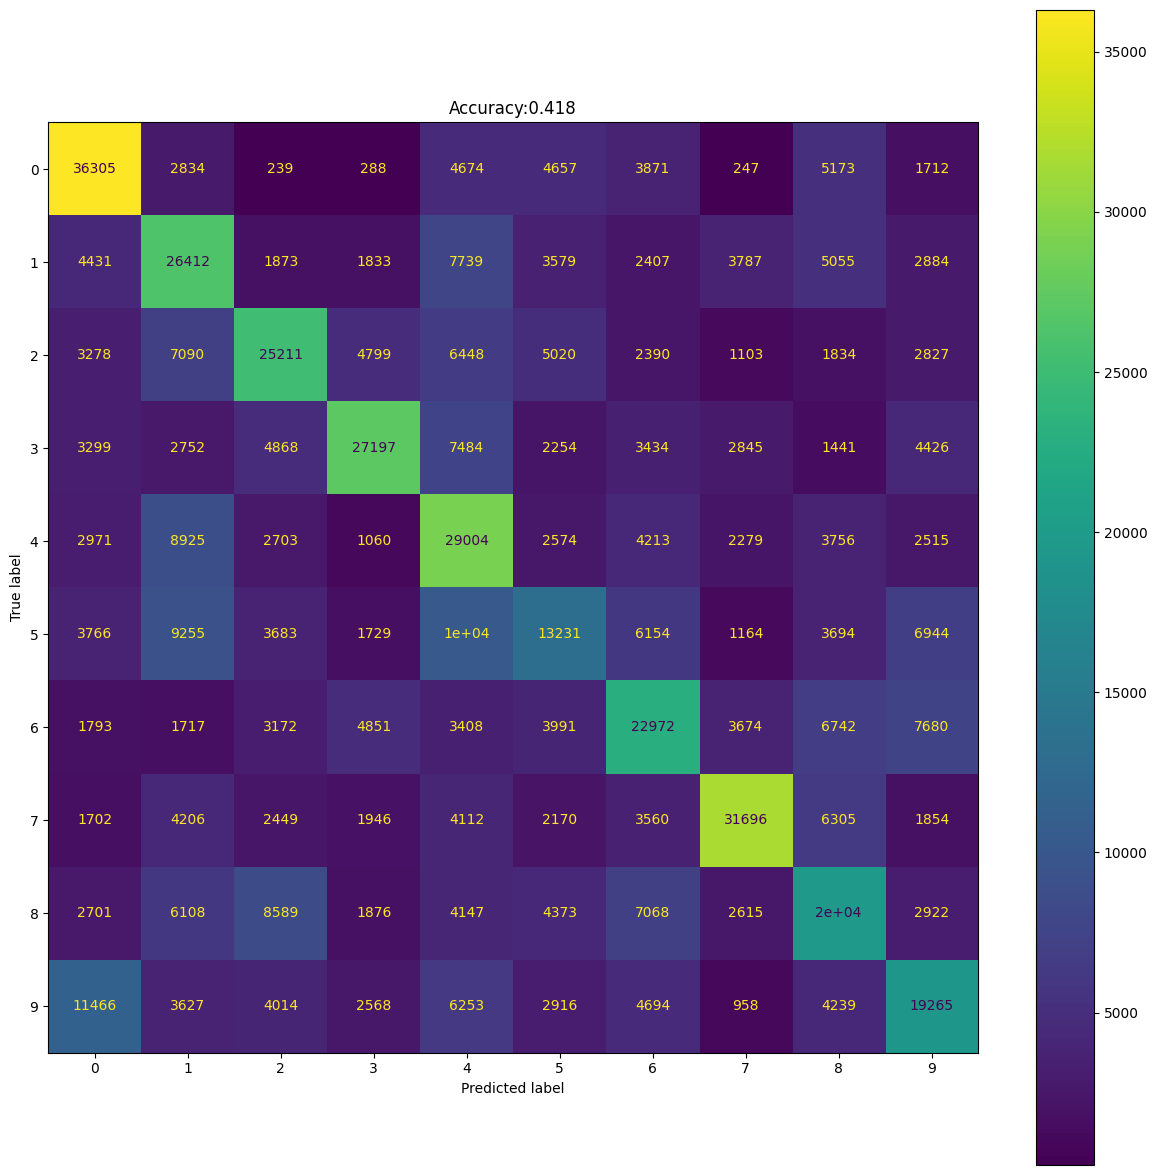

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## cross model Checking of pool model with another new set of datasets

## iPhone13_I(ii) dataset

In [37]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_Validate/iPhone13/iPhone13_I_(ii)/"
    if(i==0):
        data = getData(folder_path + "calendar_app.cfile")
        print(np.array(data))
        X_new, Y_new = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera_photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera_video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home_screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web-browser_app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X_new = np.concatenate((X_new, dataset), axis=0) 
        Y_new = np.concatenate((Y_new, label), axis=0)
        
    print(X_new.shape)
    print(Y_new.shape)

[0.0234375+0.0078125j 0.0234375+0.015625j  0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.j       ]
2048
110831
(2048, 110831)
[0.01812677 0.00948843 0.00374635 ... 0.00173856 0.00339424 0.00953503]
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0234375+0.0078125j 0.015625 +0.j        ...
 0.03125  +0.j        0.015625 +0.015625j  0.015625 +0.015625j ]
2048
129100
(2048, 129100)
[0.0181794  0.00955586 0.00382046 ... 0.00183343 0.00367072 0.00966199]
(20000, 2048)
(20000,)
[0.0078125+0.015625j  0.0078125-0.015625j  0.0234375-0.0078125j ...
 0.0078125+0.j        0.015625 +0.j        0.015625 +0.j       ]
2048
109132
(2048, 109132)
[0.0182145  0.00951279 0.00374896 ... 0.00194378 0.00367706 0.00947664]
(30000, 2048)
(30000,)
[0.0234375+0.0078125j 0.03125  +0.j        0.0078125-0.0078125j ...
 0.0234375-0.0078125j 0.0234375+0.015625j  0.0234375+0.0078125j]
2048
127272
(2048, 127272)
[0.01857133 0.00952372 0.00331539 ... 0.00185035 0.00354866 0.0094942 ]
(40

In [38]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5")

In [40]:
results = model.evaluate(X_new, Y_new)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 9.5372 - accuracy: 0.1835
test loss, test acc: [9.53723430633545, 0.18348999321460724]


In [41]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(Y_new, y_pred))
print(classification_report(Y_new, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[7 7 7 ... 6 6 6]
7
[[   0   43    0   68    0    0    0 9789  100    0]
 [   0 1347    2  594   24   16  567 6393 1050    7]
 [   0  333    7  395   31   20  155 8635  422    2]
 [  10 1126   59  464 1478 1259   63 3234 2307    0]
 [   0 2148  771  381 1299 1869 1041  562 1927    2]
 [   0 1092 1197  154 1219  774 2723  251  222 2368]
 [   0  681  467   94 2233 1870 3345   29  121 1160]
 [   1  131    5    4    9   19    9 9611  102  109]
 [   0    0    4   66    3    0    5 9912    9    1]
 [   0  181  536   24  818 1226 5654   32   36 1493]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.19      0.13      0.16     10000
           2       0.00      0.00      0.00     10000
           3       0.21      0.05      0.08     10000
           4       0.18      0.13      0.15     10000
           5       0.11      0.08      0.09     10000
           6

Test Accuracy:0.18349


Text(0.5, 1.0, 'Accuracy:0.183')

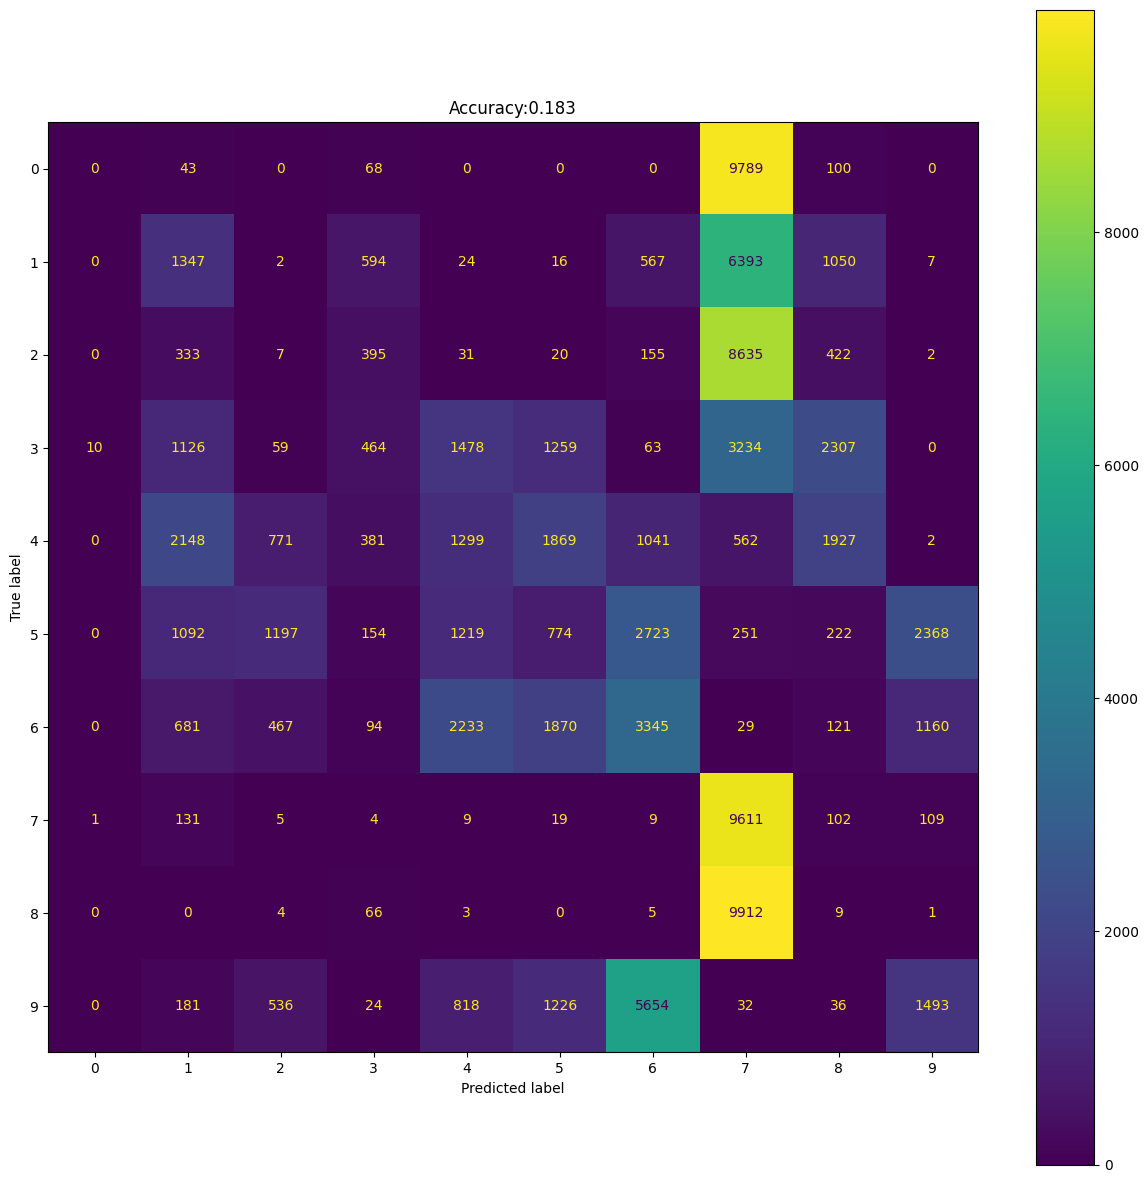

In [43]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y_new)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y_new, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## Application of Transfer Learning

In [45]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [46]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [47]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [48]:
history = model.fit(X_new, Y_new, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 3.3424 - accuracy: 0.2690
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2529 - accuracy: 0.5377
Epoch 3/30
3125/3125 [==============================] - 17s 5ms/step - loss: 0.8656 - accuracy: 0.6585
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.7578 - accuracy: 0.7020
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7155 - accuracy: 0.7180
Epoch 6/30
3125/3125 [==============================] - 18s 6ms/step - loss: 0.6937 - accuracy: 0.7266
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6805 - accuracy: 0.7317
Epoch 8/30
3125/3125 [==============================] - 17s 6ms/step - loss: 0.6711 - accuracy: 0.7348
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6645 - accuracy: 0.7367
Epoch 10/30
3125/3125 [==============================] - 17s 5ms/step - l

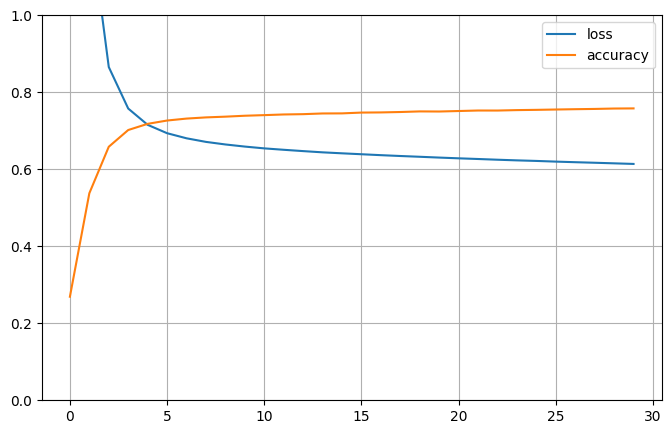

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [50]:
results = model.evaluate(X_new, Y_new)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.6134 - accuracy: 0.7588
test loss, test acc: [0.6133553385734558, 0.7587800025939941]


In [51]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(Y_new, y_pred))
print(classification_report(Y_new, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[0 0 0 ... 9 9 9]
0
[[8122  216  931   58   15    0    0  160  498    0]
 [ 283 7505 1548  107  169   31    1  253  102    1]
 [ 929 2172 5400  282  174   25    0  429  589    0]
 [  80   90  233 9381  170    7    1   33    5    0]
 [  10  210  124  153 8767  429  195   22   57   33]
 [   0   31    4    2  322 7067 1311   41   27 1195]
 [   0    2    0    2  250 2192 5672    3    4 1875]
 [ 137  156  314   22   19   86    2 8601  663    0]
 [ 292   23  443    7   20    7    0  381 8826    1]
 [   0    1    0    2   79 1783 1591    4    3 6537]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     10000
           1       0.72      0.75      0.74     10000
           2       0.60      0.54      0.57     10000
           3       0.94      0.94      0.94     10000
           4       0.88      0.88      0.88     10000
           5       0.61      0.71      0.65     10000
           6

Test Accuracy:0.75878


Text(0.5, 1.0, 'Accuracy:0.759')

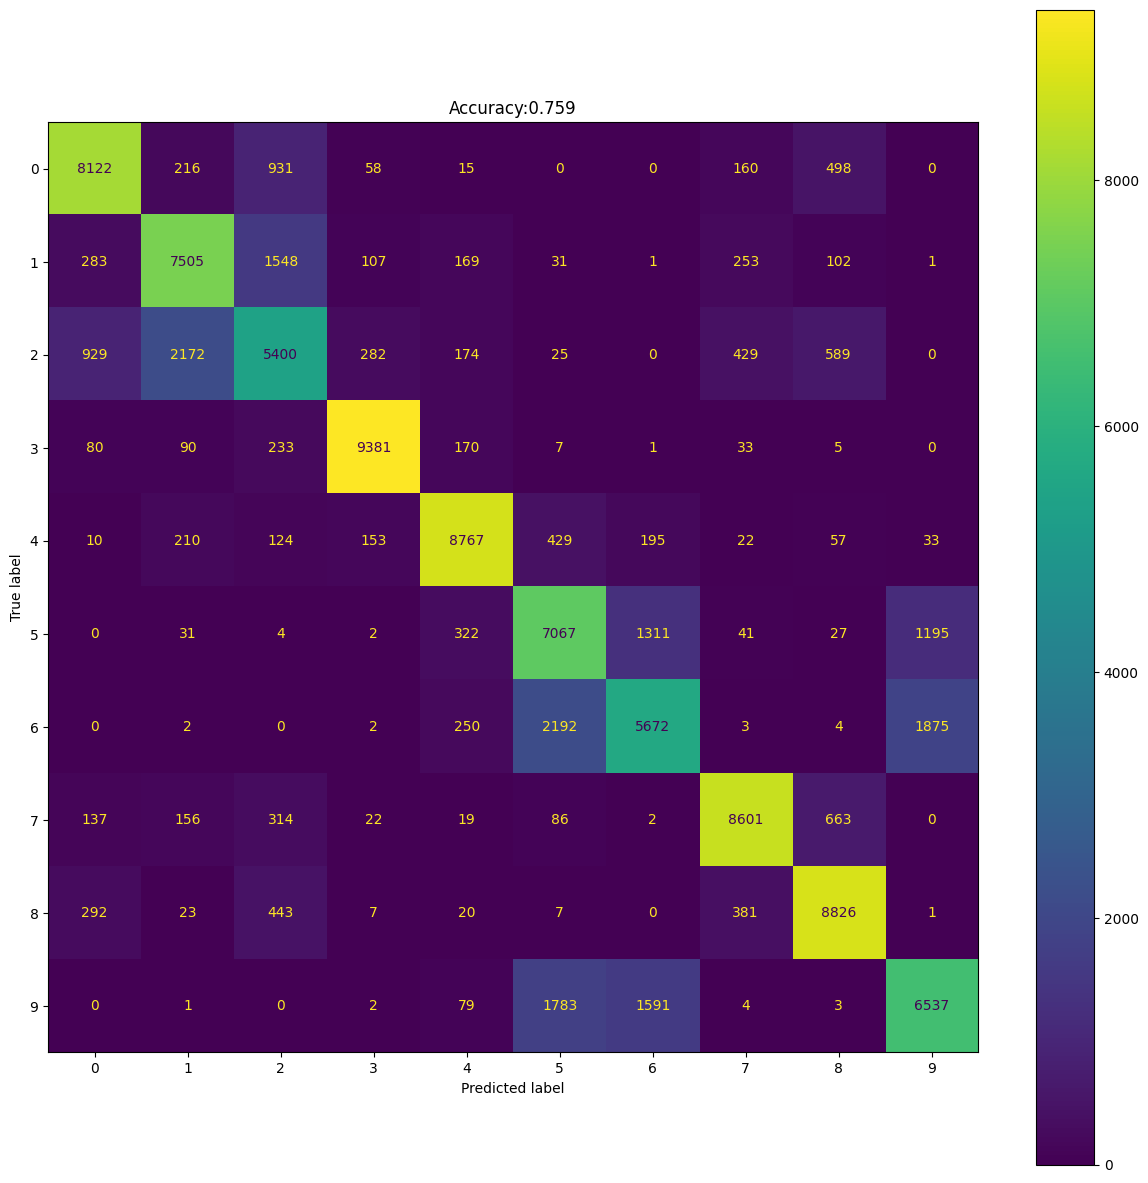

In [52]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y_new)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y_new, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) dataset

In [53]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone13_I_Validate/iPhone13_I_(iii)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X_new, Y_new = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X_new = np.concatenate((X_new, dataset), axis=0) 
        Y_new = np.concatenate((Y_new, label), axis=0)
        
    print(i)
    print(X_new.shape)
    print(Y_new.shape)

[0.0078125+0.j        0.015625 -0.0078125j 0.015625 +0.015625j  ...
 0.0078125+0.015625j  0.015625 -0.0078125j 0.0234375+0.j       ]
2048
80972
(2048, 80972)
[0.01880924 0.00981325 0.00367837 ... 0.00182399 0.00400141 0.00982514]
0
(10000, 2048)
(10000,)
[0.015625 +0.015625j  0.0234375+0.j        0.015625 +0.0078125j ...
 0.015625 -0.0078125j 0.0234375+0.0078125j 0.015625 +0.0078125j]
2048
76655
(2048, 76655)
[0.01861852 0.00976308 0.00390186 ... 0.00166154 0.00340372 0.00974781]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.015625 +0.015625j  0.015625 +0.0078125j ...
 0.0234375+0.j        0.0234375+0.j        0.015625 +0.0078125j]
2048
79607
(2048, 79607)
[0.01836303 0.00984234 0.00339005 ... 0.00192302 0.00387786 0.00964942]
2
(30000, 2048)
(30000,)
[0.0078125+0.j        0.015625 +0.j        0.0234375+0.015625j  ...
 0.       +0.0078125j 0.015625 -0.0078125j 0.0078125+0.j       ]
2048
84264
(2048, 84264)
[0.01883226 0.00979095 0.00402313 ... 0.00170837 0.00366977 0.00980111]
3
(40

In [54]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5")

In [55]:
results = model.evaluate(X_new, Y_new)
print("test loss, test acc:", results)

3125/3125 [==============================] - 19s 6ms/step - loss: 9.8389 - accuracy: 0.0808
test loss, test acc: [9.838897705078125, 0.08079999685287476]


In [56]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(Y_new, y_pred))
print(classification_report(Y_new, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[8 2 9 ... 9 9 9]
8
[[   0  129 5056  154    5  897 2221  619  245  674]
 [   1  953 4706  977  754  950  375 1110  166    8]
 [   0  442 1701  838  948 1212 1073 3562  149   75]
 [   0  821 2460  391  282 2776 1988  685  562   35]
 [   0    1 6098 2600   32   63  281  351  574    0]
 [   0    2 6709 1757   11   36  142  827  492   24]
 [   0  367 4245  375  169  233  510 3671  330  100]
 [   0    1 4722 5196    0    0   34    1   36   10]
 [  21    0    0 9908    0    1   59    9    0    2]
 [3628    1    0  590    3    2 1317    3    0 4456]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.35      0.10      0.15     10000
           2       0.05      0.17      0.07     10000
           3       0.02      0.04      0.02     10000
           4       0.01      0.00      0.01     10000
           5       0.01      0.00      0.00     10000
           6

Test Accuracy:0.0808


Text(0.5, 1.0, 'Accuracy:0.081')

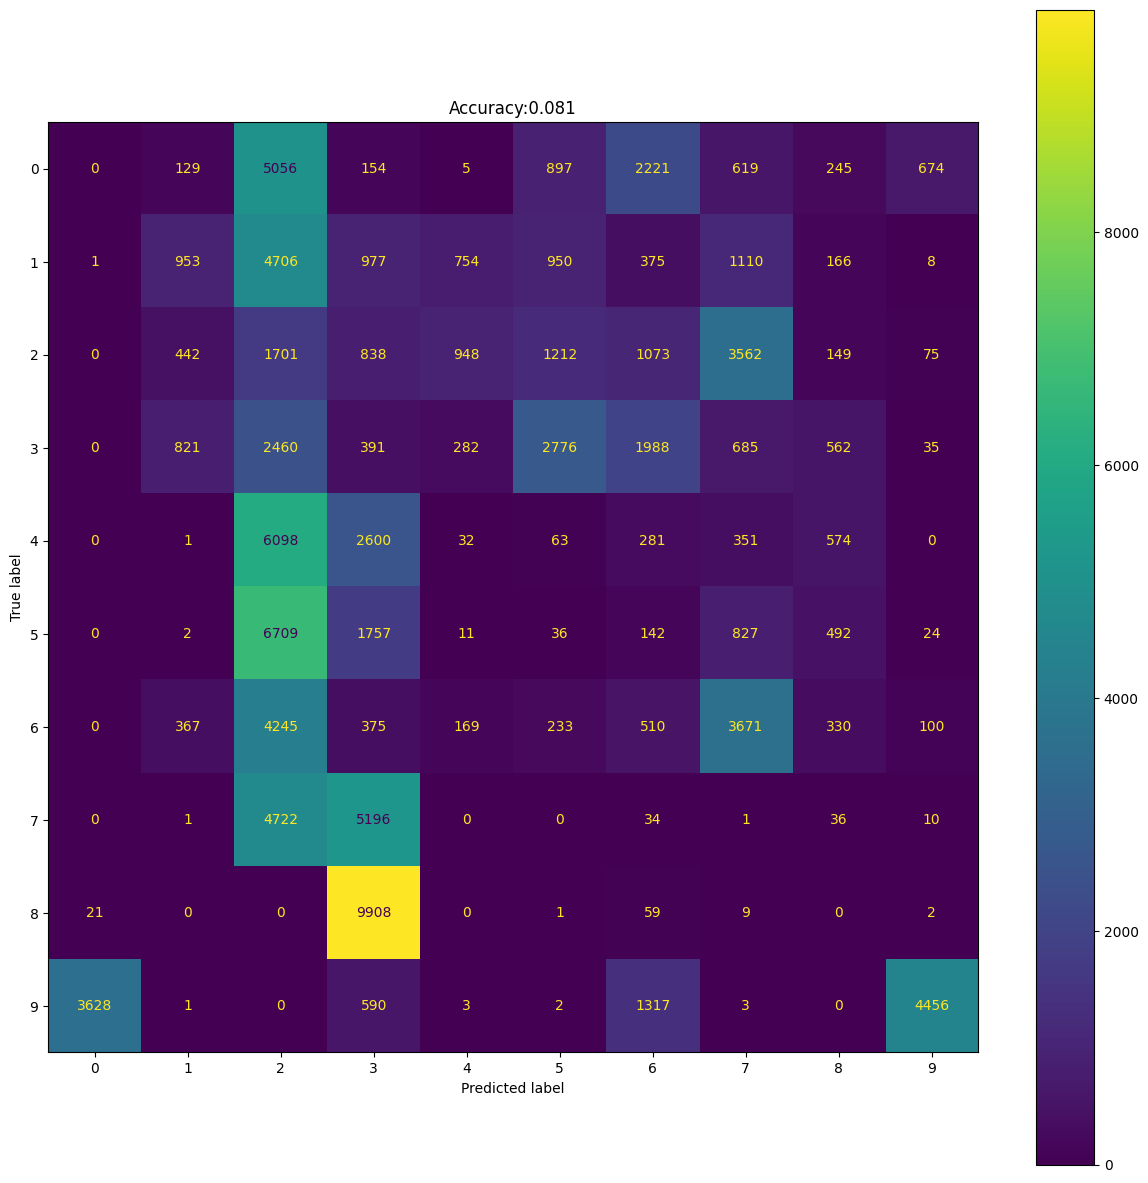

In [57]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y_new)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y_new, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## Application of Transfer Learning

In [58]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_pool_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [59]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [60]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X_new, Y_new, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 18s 5ms/step - loss: 3.4332 - accuracy: 0.3086
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.1603 - accuracy: 0.6012
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8536 - accuracy: 0.6965
Epoch 4/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7557 - accuracy: 0.7330
Epoch 5/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.7124 - accuracy: 0.7481
Epoch 6/30
3125/3125 [==============================] - 21s 7ms/step - loss: 0.6884 - accuracy: 0.7576
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6729 - accuracy: 0.7629
Epoch 8/30
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6619 - accuracy: 0.7660
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6533 - accuracy: 0.7691
Epoch 10/30
3125/3125 [==============================] - 16s 5ms/step - l

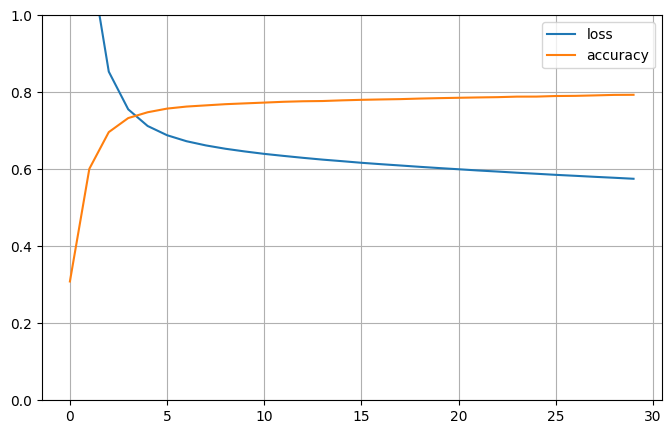

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [62]:
results = model.evaluate(X_new, Y_new)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 0.5737 - accuracy: 0.7946
test loss, test acc: [0.5736905932426453, 0.7945600152015686]


In [63]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(Y_new, y_pred))
print(classification_report(Y_new, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[0 0 0 ... 9 9 9]
0
[[8361  117   63  170   50  458  763   16    1    1]
 [ 149 6673  976  714  302  136 1047    2    0    1]
 [ 177 1453 6067 1294  152   42  809    0    5    1]
 [ 275  806 1285 7219  143   14  252    1    2    3]
 [  77  324   56   67 7867 1226  362   15    5    1]
 [ 554  118   17   12 1453 6949  812   75    9    1]
 [ 746 1013  620  252  231  557 6580    1    0    0]
 [   9    1    1    2    6   43    1 9933    2    2]
 [   0    2    8    0   18    2    0    0 9945   25]
 [   0    0   12   19    5    0    0    0  102 9862]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     10000
           1       0.64      0.67      0.65     10000
           2       0.67      0.61      0.64     10000
           3       0.74      0.72      0.73     10000
           4       0.77      0.79      0.78     10000
           5       0.74      0.69      0.72     10000
           6

Test Accuracy:0.79456


Text(0.5, 1.0, 'Accuracy:0.795')

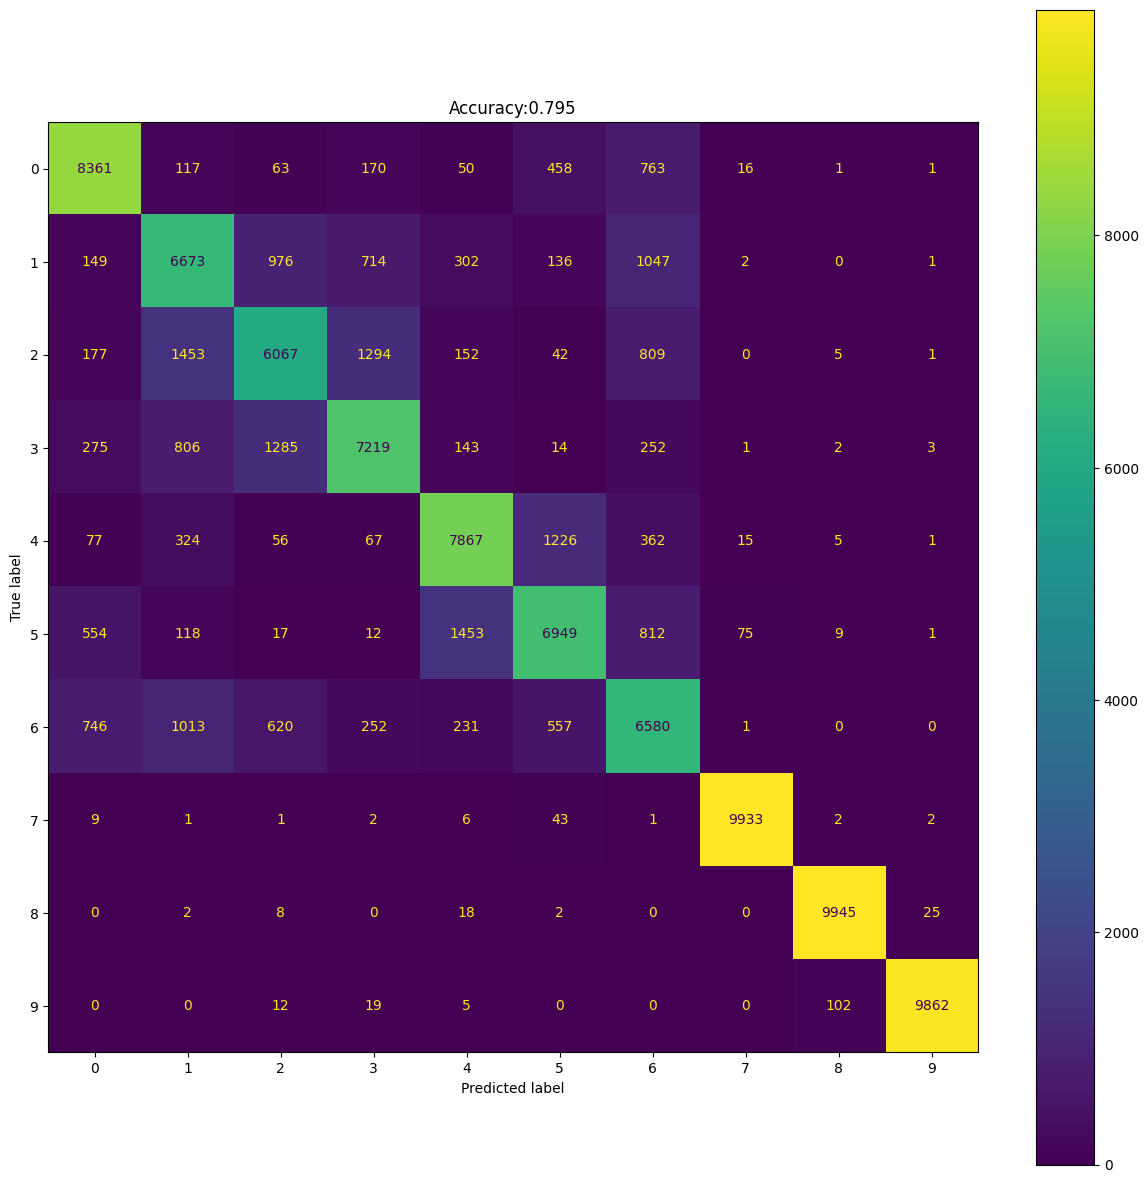

In [64]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y_new)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y_new, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')